# Simple Linear Regression

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import statsmodels.api as sm

In [2]:
# Step 2: Load Dataset
df = pd.read_csv('/content/drive/MyDrive/height-weight.csv')
print(df.head())

   Weight  Height
0      45     120
1      58     135
2      48     123
3      60     145
4      70     160


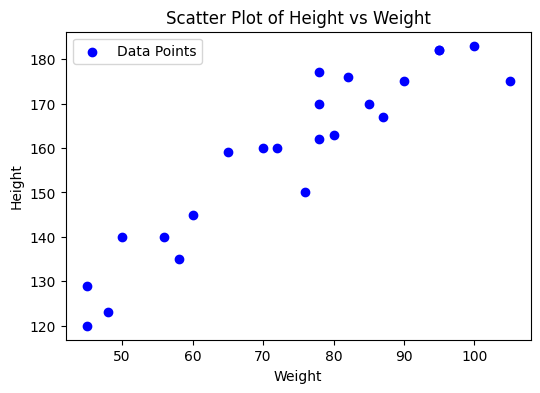

In [3]:
# Step 3: Scatter Plot (Visualization)
plt.figure(figsize=(6,4))
plt.scatter(df["Weight"], df["Height"], color='blue', label="Data Points")
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title("Scatter Plot of Height vs Weight")
plt.legend()
plt.show()

          Weight    Height
Weight  1.000000  0.931142
Height  0.931142  1.000000


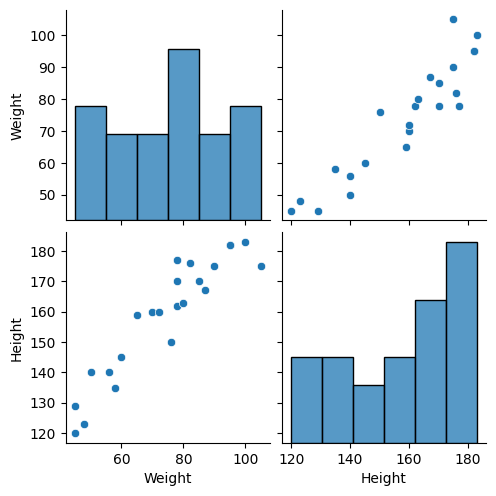

In [4]:
# Step 4: Correlation
print(df.corr())
sns.pairplot(df)
plt.show()

In [5]:
# Step 5: Define Independent & Dependent Variables
X = df[['Weight']]   # Independent variable (2D DataFrame)
Y = df['Height']     # Dependent variable (1D Series)

In [6]:
# Step 6: Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.25, random_state=42
)
print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)

Train Shape: (17, 1)
Test Shape: (6, 1)


In [7]:
# Step 7: Standardization (Consistently applied)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Step 8: Train Model on Scaled Data
regression = LinearRegression()
regression.fit(X_train_scaled, Y_train)

print("Coefficient (Slope):", regression.coef_)
print("Intercept:", regression.intercept_)

Coefficient (Slope): [17.2982057]
Intercept: 156.47058823529412


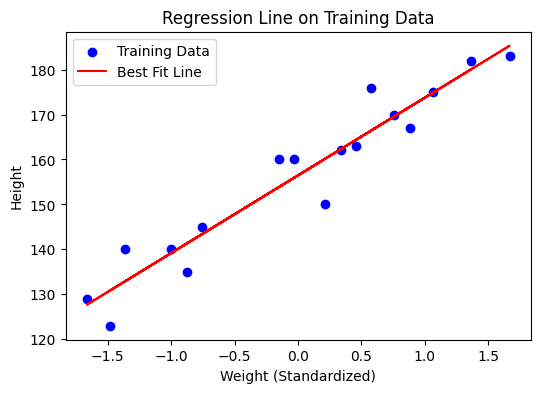

In [11]:
# Step 9: Plot Best Fit Line
plt.figure(figsize=(6,4))
plt.scatter(X_train_scaled, Y_train, color='blue', label="Training Data")
plt.plot(X_train_scaled, regression.predict(X_train_scaled), color='red', label="Best Fit Line")
plt.xlabel("Weight (Standardized)")
plt.ylabel("Height")
plt.title("Regression Line on Training Data")
plt.legend()
plt.show()

In [15]:
# Step 10: Predictions (using scaled test data)
Y_pred = regression.predict(X_test_scaled)

# Print predictions
print("Predicted Heights:\n", Y_pred[:10])   # first 10 predictions

# Compare Actual vs Predicted in a DataFrame
results = pd.DataFrame({
    "Actual Height": Y_test.values,
    "Predicted Height": Y_pred
})
print("\nComparison of Actual vs Predicted (first 10 rows):")
print(results.head(10))

Predicted Heights:
 [162.26499721 162.26499721 127.68347133 180.07972266 148.64197186
 190.55897293]

Comparison of Actual vs Predicted (first 10 rows):
   Actual Height  Predicted Height
0            177        162.264997
1            170        162.264997
2            120        127.683471
3            182        180.079723
4            159        148.641972
5            175        190.558973


In [16]:
# Step 11: Performance Metrics
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)

MSE: 114.84069295228699
MAE: 9.66512588679501
RMSE: 10.716374991212605
R2 Score: 0.7360826717981276


In [17]:
# Step 12: OLS Regression (with Intercept)
X_train_ols = sm.add_constant(X_train_scaled)
model = sm.OLS(Y_train, X_train_ols).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Height   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     174.5
Date:                Sun, 07 Sep 2025   Prob (F-statistic):           1.15e-09
Time:                        11:22:28   Log-Likelihood:                -51.726
No. Observations:                  17   AIC:                             107.5
Df Residuals:                      15   BIC:                             109.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        156.4706      1.310    119.477      0.0

In [18]:
# Step 13: Predict for New Data (Weight = 72)
new_weight = pd.DataFrame([[72]], columns=['Weight'])
new_weight_scaled = scaler.transform(new_weight)  # Apply same scaling
prediction = regression.predict(new_weight_scaled)[0]
print("Predicted Height for Weight=72:", prediction)

Predicted Height for Weight=72: 155.9774470462742
